<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="nematoda"
dataset = 4
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

        X0     X1     X2     X3     X4      X5      X6     X7     X8     X9  \
0    1.795  2.821  4.359  1.026  0.513   4.872  31.026  0.769  2.051  4.872   
1    7.463  6.343  2.985  2.985  3.731   5.597   4.478  6.343  3.731  9.701   
2    8.166  5.701  2.465  5.547  2.465   6.163   3.544  3.082  4.006  6.471   
3    4.819  7.229  5.622  3.815  4.016   4.418   3.414  5.020  2.610  6.426   
4    6.797  5.882  5.490  6.797  1.176   9.412   4.052  4.183  2.353  6.928   
..     ...    ...    ...    ...    ...     ...     ...    ...    ...    ...   
495  7.399  5.489  4.535  5.012  1.432   7.637   2.864  4.057  3.580  6.444   
496  4.255  8.511  4.255  6.383  2.128  11.702   3.191  4.787  2.660  3.191   
497  7.692  7.240  4.525  3.620  0.905   4.072   4.072  6.787  4.072  8.597   
498  6.667  7.879  2.424  4.242  4.242   4.242   1.818  9.091  4.242  4.848   
499  4.8

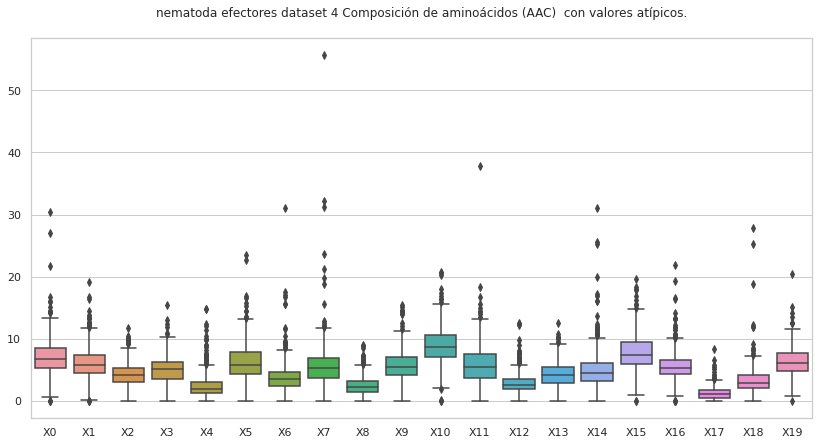

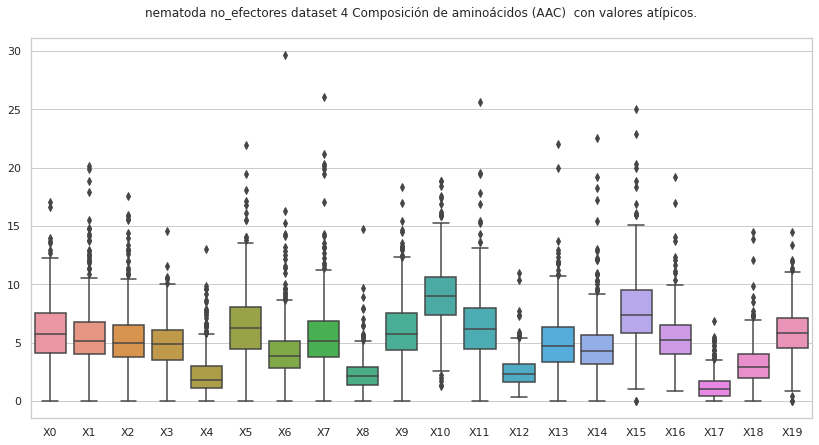

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

        X0     X1     X2     X3     X4      X5     X6     X7     X8     X9  \
1    7.463  6.343  2.985  2.985  3.731   5.597  4.478  6.343  3.731  9.701   
2    8.166  5.701  2.465  5.547  2.465   6.163  3.544  3.082  4.006  6.471   
3    4.819  7.229  5.622  3.815  4.016   4.418  3.414  5.020  2.610  6.426   
4    6.797  5.882  5.490  6.797  1.176   9.412  4.052  4.183  2.353  6.928   
5    8.116  3.188  6.957  6.667  1.159   5.507  2.609  5.797  0.870  6.087   
..     ...    ...    ...    ...    ...     ...    ...    ...    ...    ...   
495  7.399  5.489  4.535  5.012  1.432   7.637  2.864  4.057  3.580  6.444   
496  4.255  8.511  4.255  6.383  2.128  11.702  3.191  4.787  2.660  3.191   
497  7.692  7.240  4.525  3.620  0.905   4.072  4.072  6.787  4.072  8.597   
498  6.667  7.879  2.424  4.242  4.242   4.242  1.818  9.091  4.242  4.848   
499  4.895  5.944  

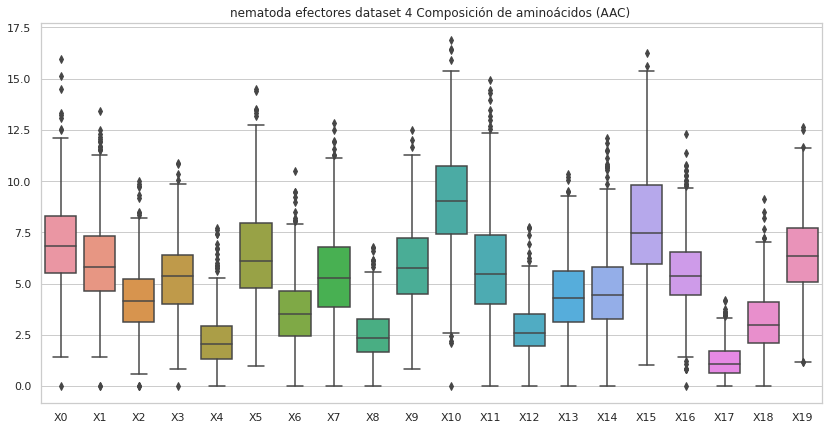

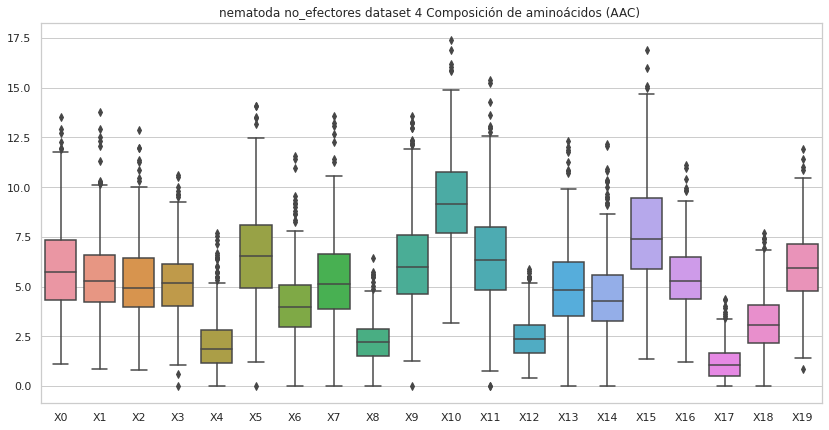

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.009484  0.002710  0.005419  0.025743  0.014904  0.004065  0.010839   
1    0.056885  0.028443  0.022754  0.042664  0.019910  0.048352  0.028443   
2    0.064304  0.019412  0.043678  0.048531  0.030332  0.024266  0.031545   
3    0.015740  0.013116  0.012461  0.014428  0.023610  0.016396  0.008526   
4    0.039163  0.006778  0.039163  0.054225  0.019581  0.024100  0.013556   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.049165  0.009516  0.033305  0.050751  0.041235  0.026961  0.023789   
496  0.008540  0.004270  0.012810  0.023484  0.007472  0.009607  0.005337   
497  0.054985  0.006469  0.025875  0.029110  0.022641  0.048517  0.029110   
498  0.036731  0.023374  0.023374  0.023374  0.040070  0.050088  0.023374   
499  0.0

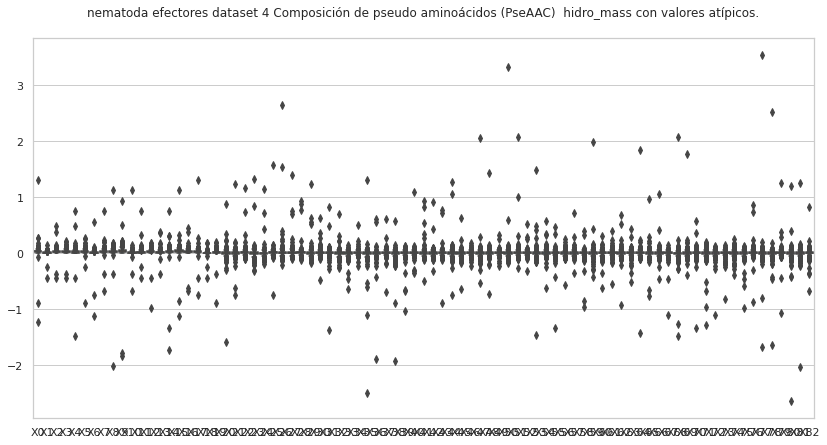

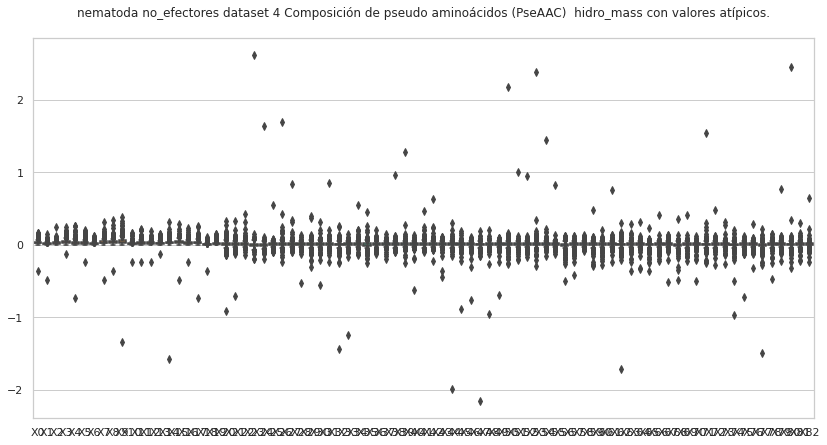

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
1    0.056885  0.028443  0.022754  0.042664  0.019910  0.048352  0.028443   
2    0.064304  0.019412  0.043678  0.048531  0.030332  0.024266  0.031545   
3    0.015740  0.013116  0.012461  0.014428  0.023610  0.016396  0.008526   
4    0.039163  0.006778  0.039163  0.054225  0.019581  0.024100  0.013556   
5    0.036753  0.005250  0.030190  0.024939  0.019689  0.026252  0.003938   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.049165  0.009516  0.033305  0.050751  0.041235  0.026961  0.023789   
496  0.008540  0.004270  0.012810  0.023484  0.007472  0.009607  0.005337   
497  0.054985  0.006469  0.025875  0.029110  0.022641  0.048517  0.029110   
498  0.036731  0.023374  0.023374  0.023374  0.040070  0.050088  0.023374   
499  0.0

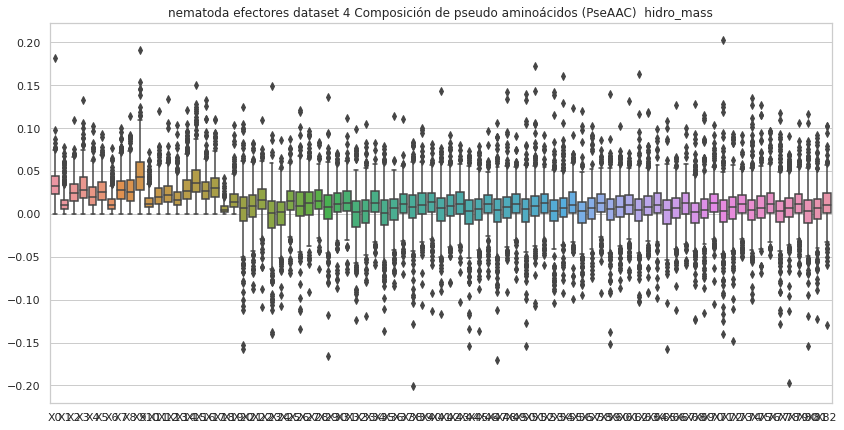

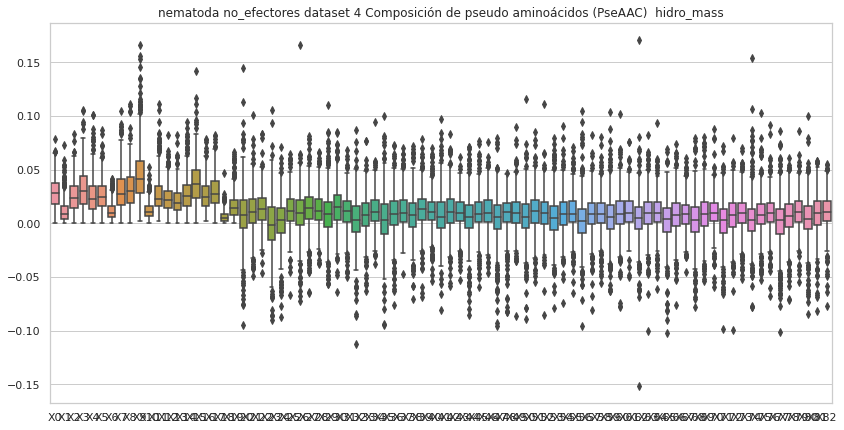

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.014014  0.004004  0.008008  0.038038  0.022022  0.006006  0.016016   
1    0.049563  0.024782  0.019825  0.037172  0.017347  0.042129  0.024782   
2    0.063488  0.019166  0.043124  0.047915  0.029947  0.023958  0.031145   
3    0.030813  0.025677  0.024393  0.028245  0.046219  0.032096  0.016690   
4    0.059807  0.010351  0.059807  0.082810  0.029904  0.036805  0.020703   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.055731  0.010787  0.037753  0.057528  0.046742  0.030562  0.026966   
496  0.039800  0.019900  0.059699  0.109449  0.034825  0.044775  0.024875   
497  0.056048  0.006594  0.026375  0.029672  0.023078  0.049454  0.029672   
498  0.044382  0.028243  0.028243  0.028243  0.048416  0.060520  0.028243   
499  0.041170 

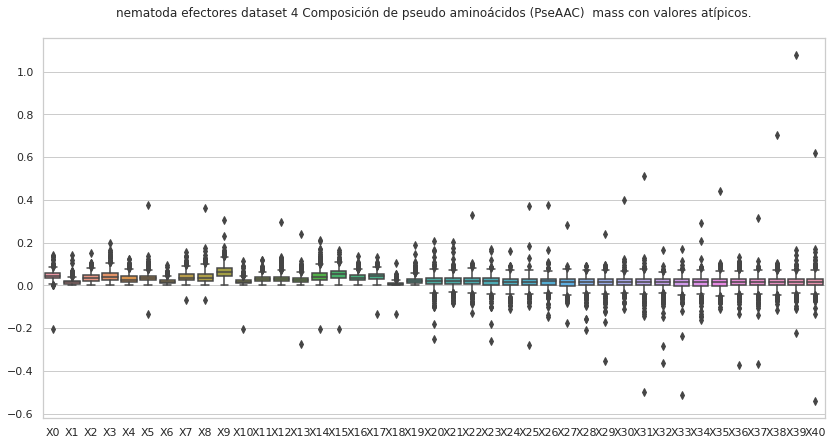

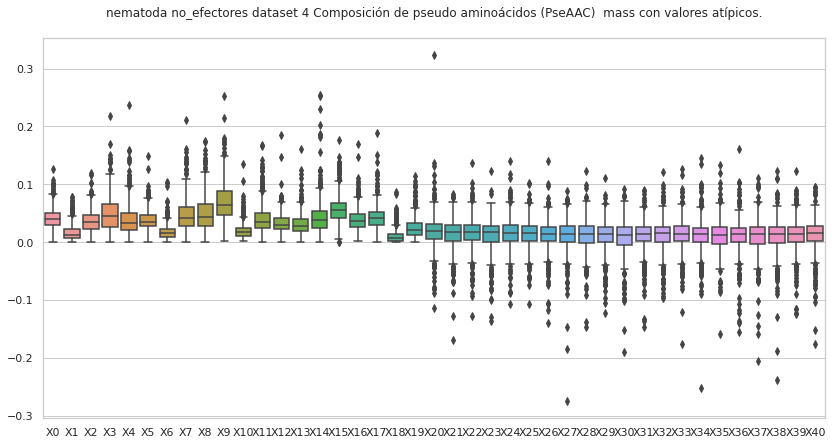

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
1    0.049563  0.024782  0.019825  0.037172  0.017347  0.042129  0.024782   
2    0.063488  0.019166  0.043124  0.047915  0.029947  0.023958  0.031145   
3    0.030813  0.025677  0.024393  0.028245  0.046219  0.032096  0.016690   
4    0.059807  0.010351  0.059807  0.082810  0.029904  0.036805  0.020703   
5    0.039912  0.005702  0.032785  0.027083  0.021381  0.028508  0.004276   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.055731  0.010787  0.037753  0.057528  0.046742  0.030562  0.026966   
496  0.039800  0.019900  0.059699  0.109449  0.034825  0.044775  0.024875   
497  0.056048  0.006594  0.026375  0.029672  0.023078  0.049454  0.029672   
498  0.044382  0.028243  0.028243  0.028243  0.048416  0.060520  0.028243   
499  0.041170  0.002941 

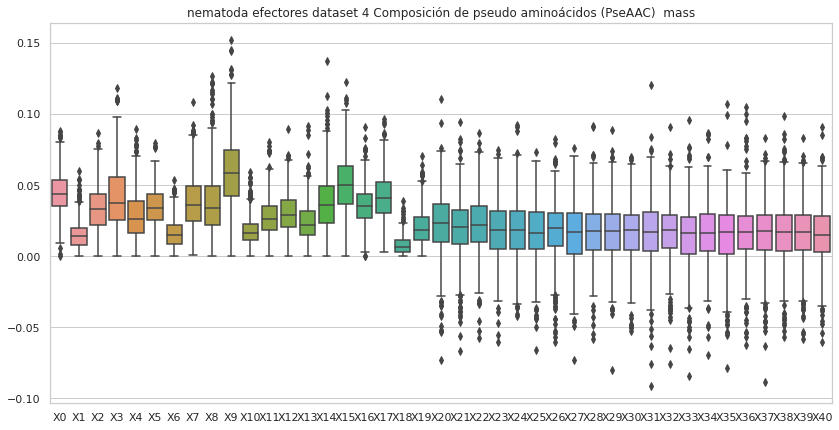

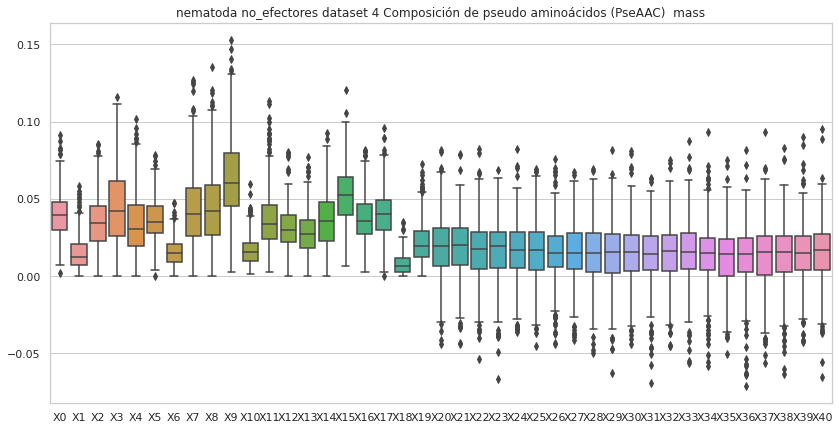

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.011136  0.003182  0.006364  0.030227  0.017500  0.004773  0.012727   
1    0.092567  0.046284  0.037027  0.069425  0.032399  0.078682  0.046284   
2    0.083019  0.025062  0.056391  0.062656  0.039160  0.031328  0.040727   
3    0.019294  0.016078  0.015274  0.017686  0.028941  0.020098  0.010451   
4    0.042507  0.007357  0.042507  0.058855  0.021253  0.026158  0.014714   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.062844  0.012163  0.042572  0.064871  0.052708  0.034463  0.030408   
496  0.008660  0.004330  0.012990  0.023815  0.007578  0.009743  0.005413   
497  0.074936  0.008816  0.035264  0.039672  0.030856  0.066120  0.039672   
498  0.050780  0.032314  0.032314  0.032314  0.055396  0.069245  0.032314   
499  0.036475

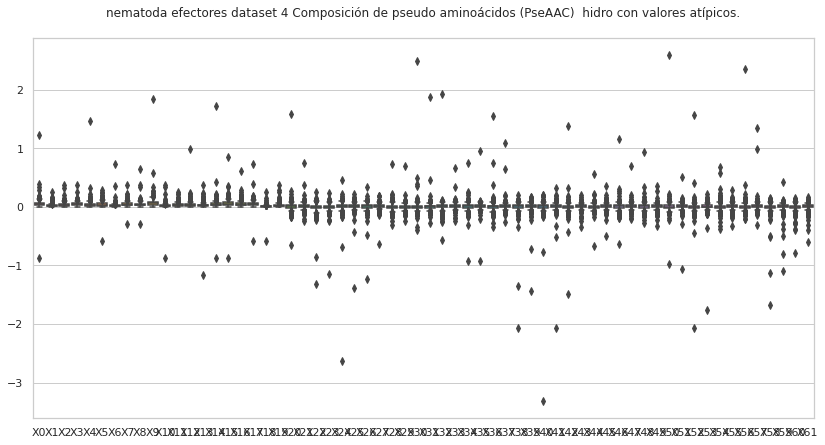

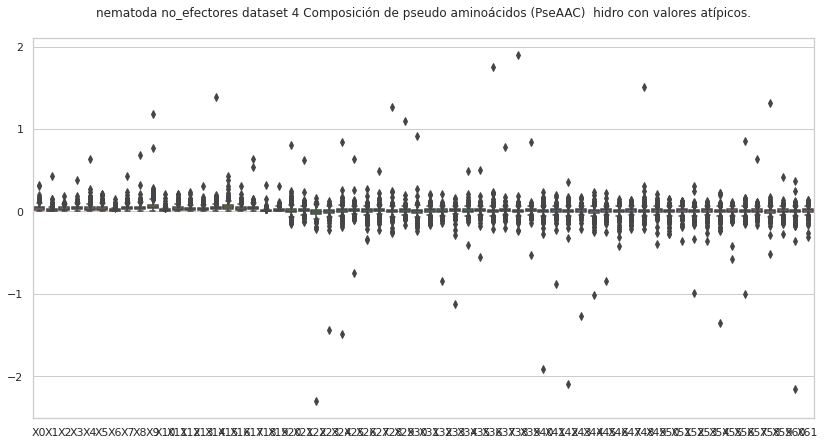

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.011136  0.003182  0.006364  0.030227  0.017500  0.004773  0.012727   
1    0.092567  0.046284  0.037027  0.069425  0.032399  0.078682  0.046284   
2    0.083019  0.025062  0.056391  0.062656  0.039160  0.031328  0.040727   
3    0.019294  0.016078  0.015274  0.017686  0.028941  0.020098  0.010451   
4    0.042507  0.007357  0.042507  0.058855  0.021253  0.026158  0.014714   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.062844  0.012163  0.042572  0.064871  0.052708  0.034463  0.030408   
496  0.008660  0.004330  0.012990  0.023815  0.007578  0.009743  0.005413   
497  0.074936  0.008816  0.035264  0.039672  0.030856  0.066120  0.039672   
498  0.050780  0.032314  0.032314  0.032314  0.055396  0.069245  0.032314   
499  0.036475  0.00

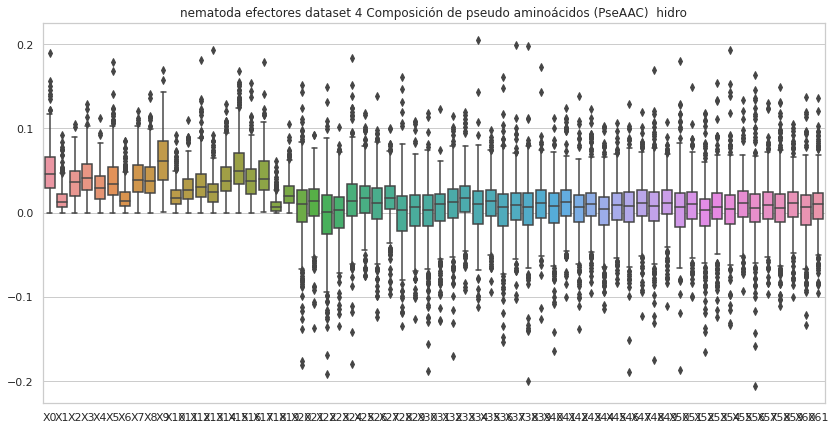

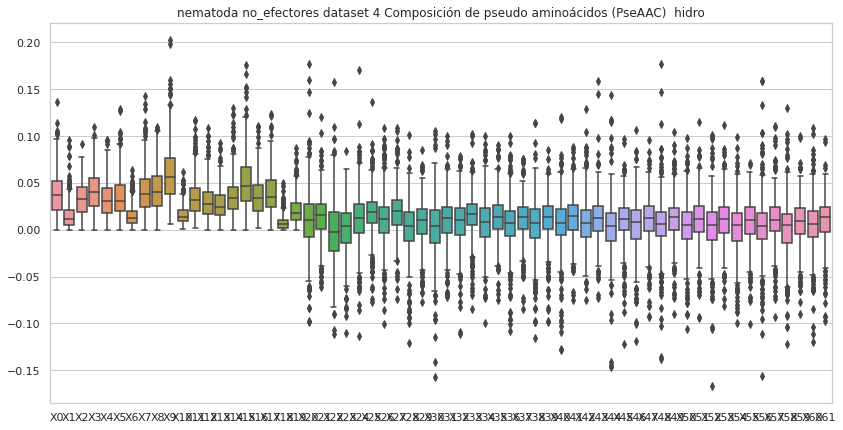

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.023642  0.023329  0.013284  0.040666  0.026471  0.015236  0.051753   
1    0.035649  0.018330  0.087357 -0.004611 -0.068975  0.010340 -0.008007   
2   -0.005317 -0.012036  0.069958  0.005763 -0.003564 -0.022218  0.014115   
3    0.014677  0.046700  0.066425 -0.071348  0.004474  0.005898 -0.053103   
4    0.030113 -0.029540  0.010632 -0.016750  0.030376 -0.008255 -0.004074   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.066859  0.036295  0.070433  0.032700 -0.008911 -0.036207  0.035014   
496  0.061628  0.062655  0.057156  0.057411 -0.018826 -0.071057  0.019859   
497 -0.105467 -0.020914  0.061333 -0.087161 -0.002571 -0.075824  0.051977   
498  0.061321  0.059642  0.018091 -0.015505  0.138756  0.067489 -0.067868   
499  0.004734 

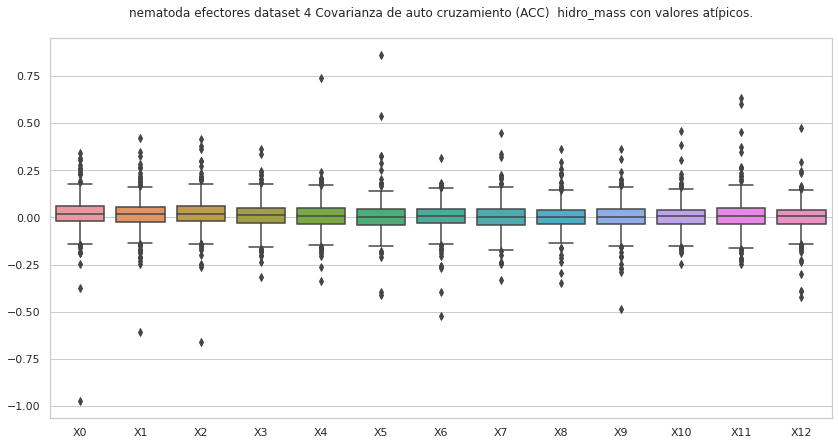

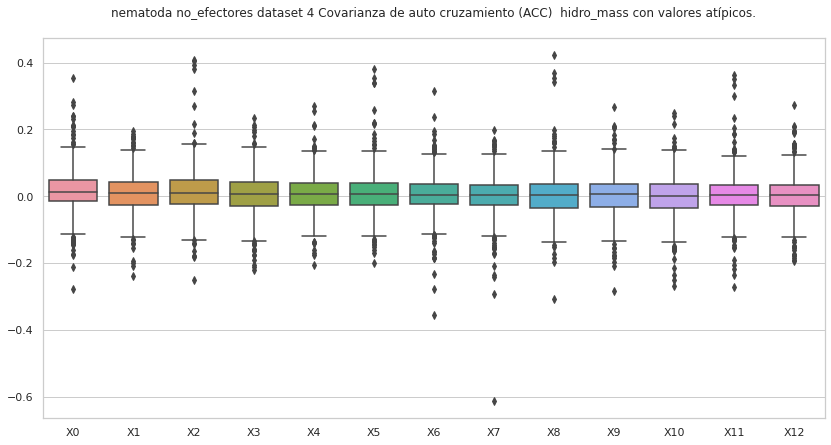

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.023642  0.023329  0.013284  0.040666  0.026471  0.015236  0.051753   
1    0.035649  0.018330  0.087357 -0.004611 -0.068975  0.010340 -0.008007   
2   -0.005317 -0.012036  0.069958  0.005763 -0.003564 -0.022218  0.014115   
3    0.014677  0.046700  0.066425 -0.071348  0.004474  0.005898 -0.053103   
4    0.030113 -0.029540  0.010632 -0.016750  0.030376 -0.008255 -0.004074   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.066859  0.036295  0.070433  0.032700 -0.008911 -0.036207  0.035014   
496  0.061628  0.062655  0.057156  0.057411 -0.018826 -0.071057  0.019859   
497 -0.105467 -0.020914  0.061333 -0.087161 -0.002571 -0.075824  0.051977   
498  0.061321  0.059642  0.018091 -0.015505  0.138756  0.067489 -0.067868   
499  0.004734 

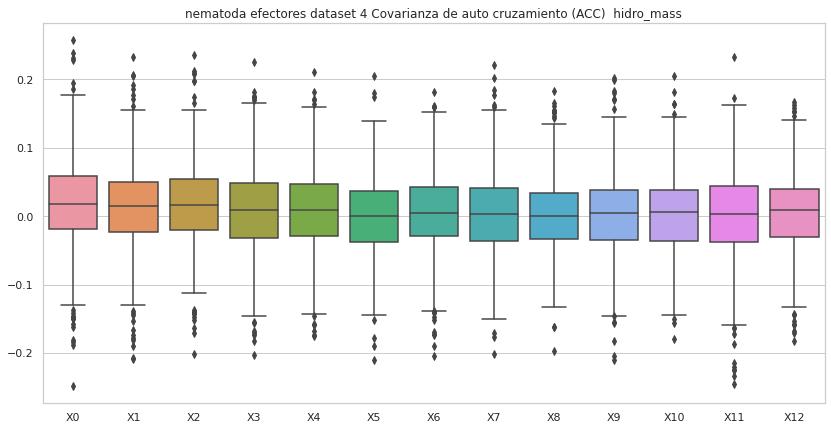

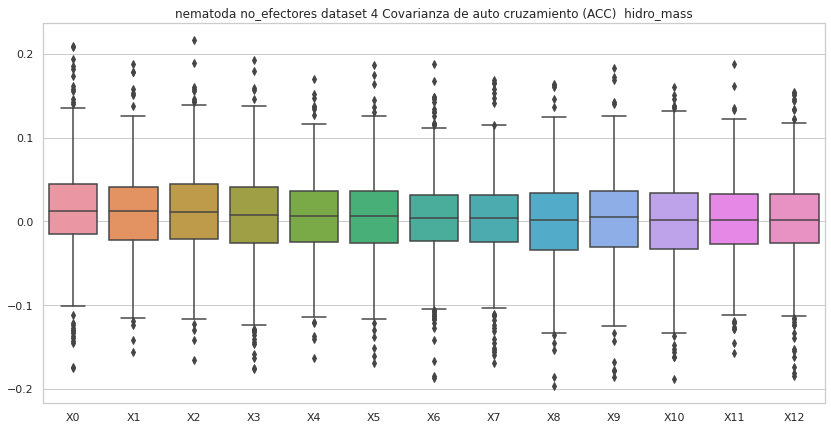

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.023642  0.023329  0.013284  0.040666  0.026471  0.015236  0.051753   
1    0.035649  0.018330  0.087357 -0.004611 -0.068975  0.010340 -0.008007   
2   -0.005317 -0.012036  0.069958  0.005763 -0.003564 -0.022218  0.014115   
3    0.014677  0.046700  0.066425 -0.071348  0.004474  0.005898 -0.053103   
4    0.030113 -0.029540  0.010632 -0.016750  0.030376 -0.008255 -0.004074   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.066859  0.036295  0.070433  0.032700 -0.008911 -0.036207  0.035014   
496  0.061628  0.062655  0.057156  0.057411 -0.018826 -0.071057  0.019859   
497 -0.105467 -0.020914  0.061333 -0.087161 -0.002571 -0.075824  0.051977   
498  0.061321  0.059642  0.018091 -0.015505  0.138756  0.067489 -0.067868   
499  0.004734  0.030

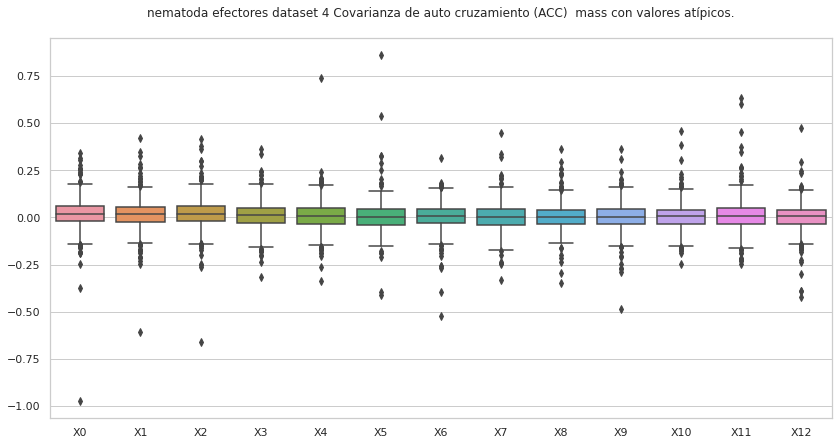

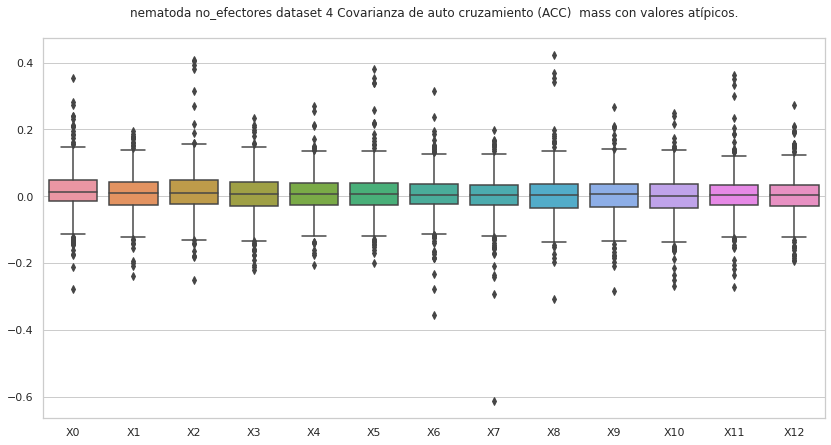

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.023642  0.023329  0.013284  0.040666  0.026471  0.015236  0.051753   
1    0.035649  0.018330  0.087357 -0.004611 -0.068975  0.010340 -0.008007   
2   -0.005317 -0.012036  0.069958  0.005763 -0.003564 -0.022218  0.014115   
3    0.014677  0.046700  0.066425 -0.071348  0.004474  0.005898 -0.053103   
4    0.030113 -0.029540  0.010632 -0.016750  0.030376 -0.008255 -0.004074   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.066859  0.036295  0.070433  0.032700 -0.008911 -0.036207  0.035014   
496  0.061628  0.062655  0.057156  0.057411 -0.018826 -0.071057  0.019859   
497 -0.105467 -0.020914  0.061333 -0.087161 -0.002571 -0.075824  0.051977   
498  0.061321  0.059642  0.018091 -0.015505  0.138756  0.067489 -0.067868   
499  0.004734  0.030948 -0.009

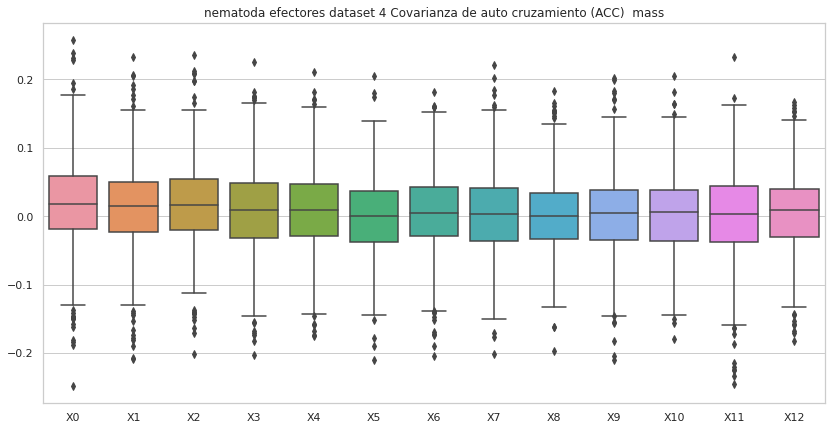

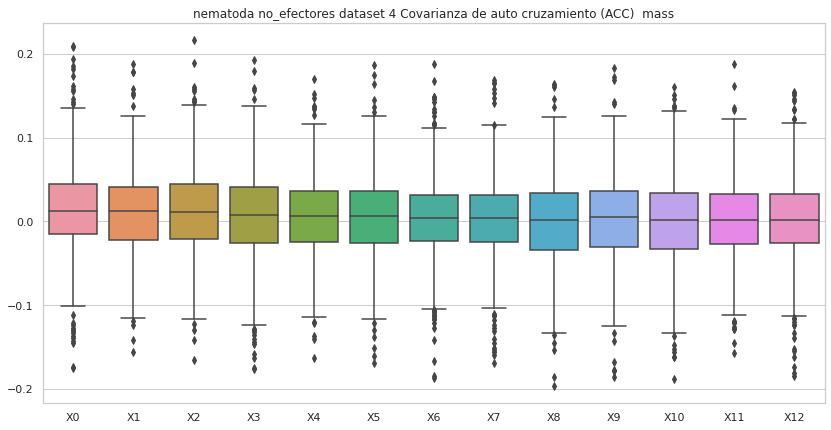

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores nematoda dataset 4, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.028711 -0.015801  0.072228  0.040547 -0.052455 -0.007357  0.020078   
1   -0.036599 -0.026153 -0.010764  0.001333  0.003238 -0.062025  0.037190   
2   -0.029981 -0.135378  0.036558  0.006781 -0.027149  0.026754  0.041512   
3    0.080662  0.073778  0.090974  0.039758  0.066878  0.073850  0.045422   
4   -0.027765 -0.067295  0.054629 -0.002677 -0.005438  0.000400  0.019138   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.030087 -0.045489  0.033518  0.018402 -0.023900 -0.004714 -0.014491   
496 -0.137377 -0.023717  0.057842  0.172777  0.047206  0.013638  0.085346   
497 -0.013672 -0.087455 -0.050489 -0.041589 -0.097680  0.046167 -0.026502   
498  0.116427  0.012649  0.115212 -0.008380  0.126774  0.156099 -0.052903   
499 -0.055984 -0.16

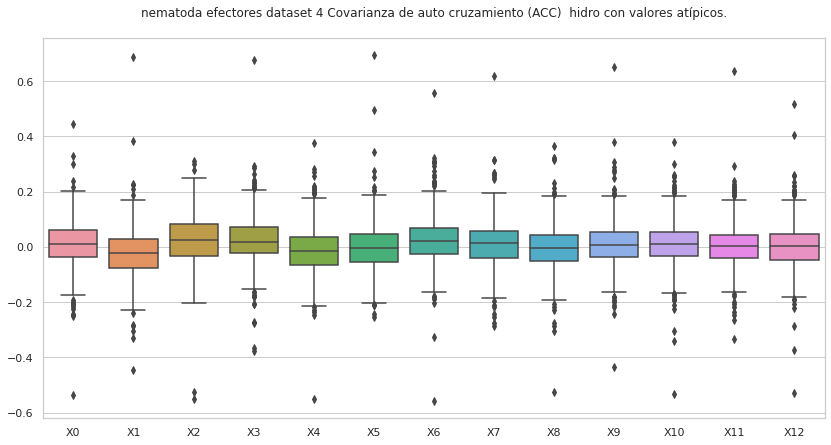

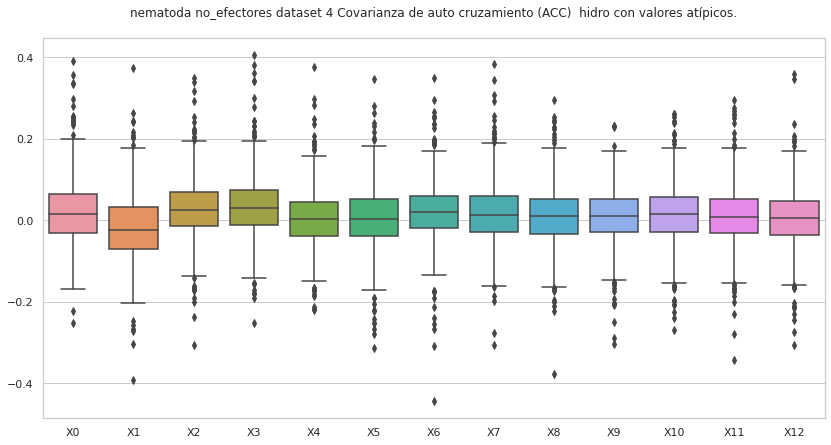

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores nematoda dataset 4, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.028711 -0.015801  0.072228  0.040547 -0.052455 -0.007357  0.020078   
1   -0.036599 -0.026153 -0.010764  0.001333  0.003238 -0.062025  0.037190   
2   -0.029981 -0.135378  0.036558  0.006781 -0.027149  0.026754  0.041512   
3    0.080662  0.073778  0.090974  0.039758  0.066878  0.073850  0.045422   
4   -0.027765 -0.067295  0.054629 -0.002677 -0.005438  0.000400  0.019138   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.030087 -0.045489  0.033518  0.018402 -0.023900 -0.004714 -0.014491   
496 -0.137377 -0.023717  0.057842  0.172777  0.047206  0.013638  0.085346   
497 -0.013672 -0.087455 -0.050489 -0.041589 -0.097680  0.046167 -0.026502   
498  0.116427  0.012649  0.115212 -0.008380  0.126774  0.156099 -0.052903   
499 -0.055984 -0.167736  

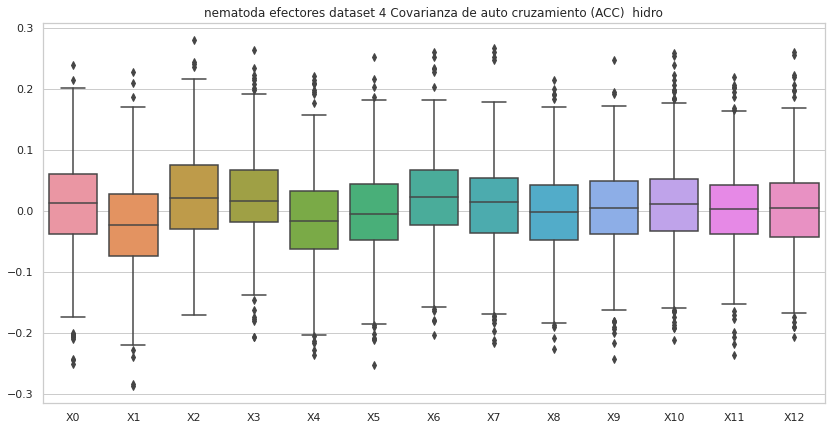

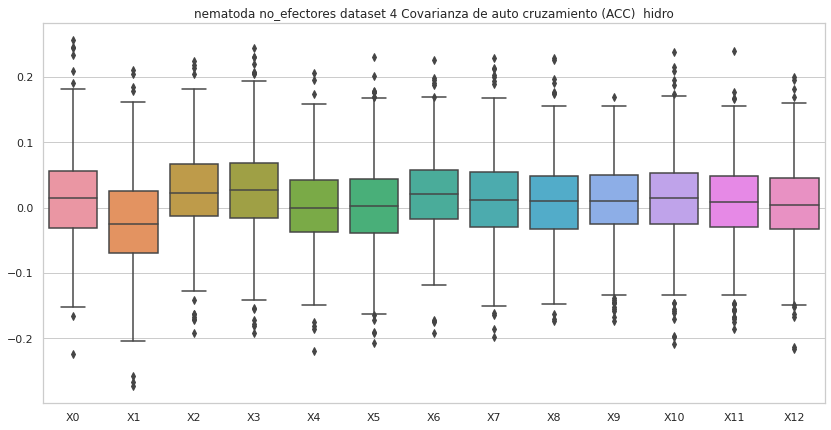

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))